## Example notebook for STEM simulator
1. Setup the server
2. initate the micrsocope
3. register a dataset
4. Query

In [ ]:
## Upon release: run the server

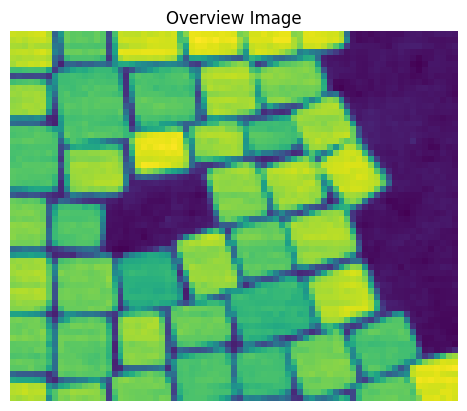

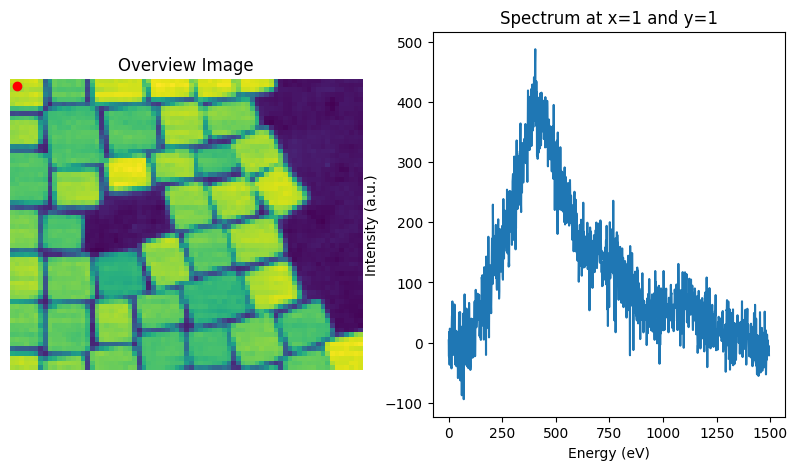

In [3]:

import matplotlib.pylab as plt
import numpy as np
import Pyro5.api



uri = "PYRO:microscope.server@localhost:9091"
mic_server = Pyro5.api.Proxy(uri)
mic_server.initialize_microscope("STEM")
mic_server.register_data("data/test_stem.h5")
# setup mic --> should return a help file about attributes and methods--->-- .help()
# eg: get overview image is channel 0
# say dataset 1 is 4dstem and dataset 2 is eels-si --> for dataset 2 it says I cant to 4dstem but I do eels 
array_list, shape, dtype = mic_server.get_overview_image()
im_array = np.array(array_list, dtype=dtype).reshape(shape)
plt.imshow(im_array)
plt.axis("off")
plt.title("Overview Image")
plt.show()
plt.close()
array_list, shape, dtype= mic_server.get_point_data(1, 1, 1)
spec_at_111 = np.array(array_list, dtype=dtype).reshape(shape)

# plot two subigure, overview image witha mark where the spectrum is taken and then on side spectrum plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im_array)
ax[0].axis("off")
ax[0].set_title("Overview Image")
ax[0].plot(1, 1, 'ro')
ax[1].plot(spec_at_111)
ax[1].set_title("Spectrum at x=1 and y=1")
ax[1].set_xlabel('Energy (eV)')
ax[1].set_ylabel('Intensity (a.u.)')
plt.show()
    
    
